In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from random import randint
from sklearn.ensemble import RandomForestRegressor

In [4]:
dataset=pd.read_csv('C:\data trained flip robo intern\project 3\Data Student project\Grades.csv')

In [5]:
dataset.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
x= dataset.iloc[:,1:-8]
y=dataset[['CGPA']]
x=x.drop("MT-442" , axis=1)    

In [7]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C+,B,C,C+,C,C-,C,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,C-,A-,D+,C-,C,A-,D,D+,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,C+,A,B+,A-,B,B+,A-,A-,B,B
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D,B-,D,B-,D+,D+,B+,C-,D+,C
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,C-,A-,B-,A-,C+,A-,B-,A-,B-,B+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,B,A-,A-,A,A+,A,A,B+,A-,A-
567,A+,A,A,A,A,A,A,A-,A,A,...,A,A,A,A,A,A,A+,A-,B+,B+
568,B,A,A-,B+,A,A,A,A,A,B,...,B,B-,B+,B+,A,B,C+,B+,A-,B
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,C,C,C+,C-,D,B-,B+,D,B


In [8]:
for col in x.columns:
    x[f'{col}'].fillna(x[f'{col}'].mode()[0], inplace = True)

In [9]:
#From 1 - 15, where 1 represents least weightage and 15 represents highest weightage of a gradepoint

X = {'A+': 15, 'A': 14, 'A-': 13, 'B+': 12, 'B': 11, 'B-': 10,
    'C+': 9, 'C': 8, 'C-': 7, 'D+': 6, 'D': 5, 'F': 4,
     'I' : 3, 'W': 2, 'WU': 1}
                
x = x.replace(X)    #replace all alphabetic grades with integer values


In [10]:

x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,10,6,7,8,7,6,5,7,10,7,...,7,9,11,8,9,8,7,8,7,7
1,14,5,6,5,10,8,5,14,6,5,...,5,7,13,6,7,8,13,5,6,5
2,14,11,14,10,12,14,10,12,13,13,...,9,14,12,13,11,12,13,13,11,11
3,5,9,6,5,5,13,6,7,5,9,...,5,10,5,10,6,6,12,7,6,8
4,13,13,13,12,14,14,13,12,14,13,...,7,13,10,13,9,13,10,13,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,11,14,14,13,15,14,13,13,15,12,...,11,13,13,14,15,14,14,12,13,13
567,15,14,14,14,14,14,14,13,14,14,...,14,14,14,14,14,14,15,13,12,12
568,11,14,13,12,14,14,14,14,14,11,...,11,10,12,12,14,11,9,12,13,11
569,14,12,5,14,5,6,10,7,10,7,...,5,8,8,9,7,5,10,12,5,11


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  #splitting a data into testing(20%) and training(80%)

In [12]:
model1 = LinearRegression()    
model1.fit(x_train,y_train) 

LinearRegression()

In [13]:
model1_score = model1.score(x_train, y_train)    #Calculating a Training score by providing trained data
print('Training Score:' , round(model1_score*100, 3) , '%') 

Training Score: 94.131 %


In [14]:
y_lin_pred1 = model1.predict(x_test)    #checking the prediction of a model by providing test data


In [15]:
model1_score = model1.score(x_test, y_test)           #Calculating a Testing score by providing test data
print('Testing Score:' , round(model1_score*100, 3) , '%')

Testing Score: 90.686 %


In [20]:
lst = []                #empty list initiated
x_col = x.columns       #fetching column first element like a name of specific course

for i in x_col:
  enter = int(input(f'Enter grade of: \n{i}: '))
  lst.append(enter)     #list is appended with provided grade
lst2 = [lst]            #list is converted to 2D

Enter grade of: 
PH-121: 6
Enter grade of: 
HS-101: 5
Enter grade of: 
CY-105: 4
Enter grade of: 
HS-105/12: 6
Enter grade of: 
MT-111: 3
Enter grade of: 
CS-105: 6
Enter grade of: 
CS-106: 7
Enter grade of: 
EL-102: 5
Enter grade of: 
EE-119: 6
Enter grade of: 
ME-107: 4
Enter grade of: 
CS-107: 6
Enter grade of: 
HS-205/20: 8
Enter grade of: 
MT-222: 6
Enter grade of: 
EE-222: 5
Enter grade of: 
MT-224: 7
Enter grade of: 
CS-210: 6
Enter grade of: 
CS-211: 5
Enter grade of: 
CS-203: 4
Enter grade of: 
CS-214: 6
Enter grade of: 
EE-217: 7
Enter grade of: 
CS-212: 5
Enter grade of: 
CS-215: 4
Enter grade of: 
MT-331: 7
Enter grade of: 
EF-303: 4
Enter grade of: 
HS-304: 7
Enter grade of: 
CS-301: 4
Enter grade of: 
CS-302: 7
Enter grade of: 
TC-383: 6
Enter grade of: 
EL-332: 7
Enter grade of: 
CS-318: 6
Enter grade of: 
CS-306: 7
Enter grade of: 
CS-312: 6
Enter grade of: 
CS-317: 7


In [21]:
lst1=model1.predict(lst2)         #Predict Gpa by providing individual course grade
lim_gpa=np.clip(lst1[0][0], a_min = 0, a_max = 4)     #if CGPA is in -ve then it will clamp to 0.0 if it greater than 4 will clamp to 4
print('CGPA: ' , round(lim_gpa, 3))

CGPA:  1.387


C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Evaluating Linear Regression for Model 3

Mean Squared Error

In [22]:
# mean_squared_error
mse_lr_model3 = mean_squared_error(y_test, y_lin_pred1)
print("i - Mean Squared Error:", round(mse_lr_model3, 3))

i - Mean Squared Error: 0.032


Mean Absolute Error

In [23]:
mae_lr_model3 = mean_absolute_error(y_test, y_lin_pred1)
print("iii - Mean Absolute Error:", round(mae_lr_model3, 3))

iii - Mean Absolute Error: 0.098


Root Mean Squared Error

In [24]:
#root mean_squared_error
rmse_lr_model3 = mean_squared_error(y_test, y_lin_pred1, squared=False)
print("ii - Root Mean Squared Error:", round(rmse_lr_model3, 3))

ii - Root Mean Squared Error: 0.18


In [25]:
print("i - Mean Squared Error:", round(mse_lr_model3, 3))
print("ii - Root Mean Squared Error:", round(rmse_lr_model3, 3))
print("iii - Mean Absolute Error:", round(mae_lr_model3, 3))

i - Mean Squared Error: 0.032
ii - Root Mean Squared Error: 0.18
iii - Mean Absolute Error: 0.098


# SVM Support Vector Machine

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)          #splitting a data i

In [27]:
regressor_1 = SVR(kernel='linear')       #applying svr and kernel is set to linear
regressor_1.fit(x_train,y_train)         #Fitting a Model 

C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [28]:
regressor_1_score = regressor_1.score(x_train, y_train)       #Calculating Training Score
print('Training Score:' , round(regressor_1_score*100, 3) , '%')

Training Score: 91.745 %


In [29]:
y_predict_svm = regressor_1.predict(x_test)     #predicting model

In [30]:
lst_svm = []
x_col = x.columns

for i in x_col:
  enter = int(input(f'Enter grade of: \n{i}: '))
  lst_svm.append(enter)
lst_svm =[lst_svm]


y_svm_predict1 = regressor_1.predict(lst_svm)
lim_gpa1=np.clip(y_svm_predict1[0], a_min = 0, a_max = 4)
print('CGPA: ' , round(lim_gpa1, 3))

Enter grade of: 
PH-121: 5
Enter grade of: 
HS-101: 6
Enter grade of: 
CY-105: 4
Enter grade of: 
HS-105/12: 6
Enter grade of: 
MT-111: 4
Enter grade of: 
CS-105: 4
Enter grade of: 
CS-106: 6
Enter grade of: 
EL-102: 7
Enter grade of: 
EE-119: 5
Enter grade of: 
ME-107: 6
Enter grade of: 
CS-107: 7
Enter grade of: 
HS-205/20: 4
Enter grade of: 
MT-222: 6
Enter grade of: 
EE-222: 4
Enter grade of: 
MT-224: 7
Enter grade of: 
CS-210: 5
Enter grade of: 
CS-211: 7
Enter grade of: 
CS-203: 4
Enter grade of: 
CS-214: 7
Enter grade of: 
EE-217: 7
Enter grade of: 
CS-212: 4
Enter grade of: 
CS-215: 3
Enter grade of: 
MT-331: 7
Enter grade of: 
EF-303: 7
Enter grade of: 
HS-304: 8
Enter grade of: 
CS-301: 6
Enter grade of: 
CS-302: 4
Enter grade of: 
TC-383: 7
Enter grade of: 
EL-332: 8
Enter grade of: 
CS-318: 5
Enter grade of: 
CS-306: 4
Enter grade of: 
CS-312: 8
Enter grade of: 
CS-317: 4
CGPA:  1.327


C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [31]:
# Mean Squared Error

# mean_squared_error
mse_svr_model3 = mean_squared_error(y_test, y_predict_svm)
print("i - Mean Squared Error:", round(mse_svr_model3, 3))

i - Mean Squared Error: 0.009


In [32]:
# Root Mean Squared Error

#root mean_squared_error
rmse_svr_model3 = mean_squared_error(y_test, y_predict_svm, squared=False)
print("ii - Root Mean Squared Error:", round(rmse_svr_model3, 3))

ii - Root Mean Squared Error: 0.093


In [34]:
# Mean Absolute Error

#mean_absolute_error
mae_svr_model3 = mean_absolute_error(y_test, y_predict_svm)
print("iii - Mean Absolute Error:", round(mae_svr_model3, 3))

iii - Mean Absolute Error: 0.069


In [35]:

print("i - Mean Squared Error:", round(mse_svr_model3, 3))
print("ii - Root Mean Squared Error:", round(rmse_svr_model3, 3))
print("iii - Mean Absolute Error:", round(mae_svr_model3, 3))

i - Mean Squared Error: 0.009
ii - Root Mean Squared Error: 0.093
iii - Mean Absolute Error: 0.069


# Implementation of Random Forest Regressor

In [36]:
#Assigning x as an input and y as an Output
x_model2= dataset.iloc[:,1:-20]
y=dataset[['CGPA']]

In [37]:
# Filling Empty Cells
for col in x_model2.columns:
    x_model2[f'{col}'].fillna(x[f'{col}'].mode()[0], inplace = True)

In [38]:


# Ordinal encoding
X = {'A+': 15, 'A': 14, 'A-': 13, 'B+': 12, 'B': 11, 'B-': 10,
    'C+': 9, 'C': 8, 'C-': 7, 'D+': 6, 'D': 5, 'F': 4,
     'I' : 3, 'W': 2, 'WU': 1}        
x_model2 = x_model2.replace(X)


In [39]:

x_train,x_test,y_train,y_test=train_test_split(x_model2,y,test_size=0.2)

In [41]:
# Fitting Random Forest Regression to the dataset
# create regressor object
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor_rf.fit(x_model2, y)

C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [42]:
regressor_rf_score = regressor_rf.score(x_train, y_train)
print('Training Score:' , round(regressor_rf_score*100, 3) , '%')

Training Score: 98.719 %


In [43]:
y_predict_rf = regressor_rf.predict(x_test)

In [44]:
regressor_rf_score = regressor_rf.score(x_test, y_test)
print('Testing Score:' , round(regressor_rf_score*100, 3) , '%')

Testing Score: 98.359 %


In [45]:
lst_rf = []
x_col = x_model2.columns

for i in x_col:
  enter = int(input(f'Enter grade of: \n{i}: '))
  lst_rf.append(enter)
lst_rf =[lst_rf]


y_rf_predict1 = regressor_rf.predict(lst_rf)
print('CGPA: ' , round(y_rf_predict1[0], 3))

Enter grade of: 
PH-121: 5
Enter grade of: 
HS-101: 6
Enter grade of: 
CY-105: 7
Enter grade of: 
HS-105/12: 4
Enter grade of: 
MT-111: 6
Enter grade of: 
CS-105: 7
Enter grade of: 
CS-106: 4
Enter grade of: 
EL-102: 6
Enter grade of: 
EE-119: 7
Enter grade of: 
ME-107: 4
Enter grade of: 
CS-107: 6
Enter grade of: 
HS-205/20: 7
Enter grade of: 
MT-222: 8
Enter grade of: 
EE-222: 7
Enter grade of: 
MT-224: 6
Enter grade of: 
CS-210: 5
Enter grade of: 
CS-211: 6
Enter grade of: 
CS-203: 7
Enter grade of: 
CS-214: 8
Enter grade of: 
EE-217: 7
Enter grade of: 
CS-212: 6
Enter grade of: 
CS-215: 5
CGPA:  1.714


C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [46]:
# <!-- Mean Squared Error -->

mse_rf_model2 = mean_squared_error(y_test, y_predict_rf)
print("i - Mean Squared Error:", round(mse_rf_model2, 3))

i - Mean Squared Error: 0.006


In [47]:
# Root Mean Squared Error

#root mean_squared_error
rmse_rf_model2 = mean_squared_error(y_test, y_predict_rf, squared=False)
print("ii - Root Mean Squared Error:", round(rmse_rf_model2, 3))

ii - Root Mean Squared Error: 0.076


In [48]:
# Mean Absolute Error

#mean_absolute_error
mae_rf_model2 = mean_absolute_error(y_test, y_predict_rf)
print("iii - Mean Absolute Error:", round(mae_rf_model2, 3))
     

iii - Mean Absolute Error: 0.048


In [49]:

print("i - Mean Squared Error:", round(mse_rf_model2, 3))
print("ii - Root Mean Squared Error:", round(rmse_rf_model2, 3))
print("iii - Mean Absolute Error:", round(mae_rf_model2, 3))

i - Mean Squared Error: 0.006
ii - Root Mean Squared Error: 0.076
iii - Mean Absolute Error: 0.048


# Implementation of Linear Regression

In [50]:
model_2_LR = LinearRegression()
model_2_LR.fit(x_train,y_train)
     

LinearRegression()

In [51]:
model_2_LR_score = model_2_LR.score(x_train, y_train)
print('Training Score:' , round(model_2_LR_score*100, 3) , '%')

Training Score: 91.417 %


In [52]:

y_LR_2 = model_2_LR.predict(x_test)
     

In [53]:
model_2_LR_score = model_2_LR.score(x_test, y_test)

In [54]:
lst_LR = []
x_col = x_model2.columns

for i in x_col:
  enter = int(input(f'Enter grade of: \n{i}: '))
  lst_LR.append(enter)
lst_LR =[lst_LR]


lst_LR_predict=model_2_LR.predict(lst_LR)
lim_gpa2=np.clip(lst_LR_predict[0][0], a_min = 0, a_max = 4)
print('CGPA: ' , round(lim_gpa2, 3))


Enter grade of: 
PH-121: 5
Enter grade of: 
HS-101: 6
Enter grade of: 
CY-105: 7
Enter grade of: 
HS-105/12: 4
Enter grade of: 
MT-111: 5
Enter grade of: 
CS-105: 6
Enter grade of: 
CS-106: 7
Enter grade of: 
EL-102: 8
Enter grade of: 
EE-119: 7
Enter grade of: 
ME-107: 6
Enter grade of: 
CS-107: 5
Enter grade of: 
HS-205/20: 4
Enter grade of: 
MT-222: 5
Enter grade of: 
EE-222: 6
Enter grade of: 
MT-224: 7
Enter grade of: 
CS-210: 8
Enter grade of: 
CS-211: 7
Enter grade of: 
CS-203: 6
Enter grade of: 
CS-214: 5
Enter grade of: 
EE-217: 4
Enter grade of: 
CS-212: 5
Enter grade of: 
CS-215: 6
CGPA:  1.457


C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
# Mean Squared Error

# mean_squared_error
mse_lr_model2 = mean_squared_error(y_test, y_LR_2)
print("i - Mean Squared Error:", round(mse_lr_model2, 3))


i - Mean Squared Error: 0.043


In [56]:
# Root Mean Squared Error

#root mean_squared_error
rmse_lr_model2 = mean_squared_error(y_test, y_LR_2, squared=False)
print("ii - Root Mean Squared Error:", round(rmse_lr_model2, 3))


ii - Root Mean Squared Error: 0.207


In [57]:
# iii) Mean Absolute~ Error

#mean_absolute_error
mae_lr_model2 = mean_absolute_error(y_test, y_LR_2)
print("iii - Mean Absolute Error:", round(mae_lr_model2, 3))


iii - Mean Absolute Error: 0.122


In [59]:
print("i - Mean Squared Error:", round(mse_lr_model2, 3))
print("ii - Root Mean Squared Error:", round(rmse_lr_model2, 3))
print("iii - Mean Absolute Error:", round(mae_lr_model2, 3))

i - Mean Squared Error: 0.043
ii - Root Mean Squared Error: 0.207
iii - Mean Absolute Error: 0.122



# Comparision of Two Models

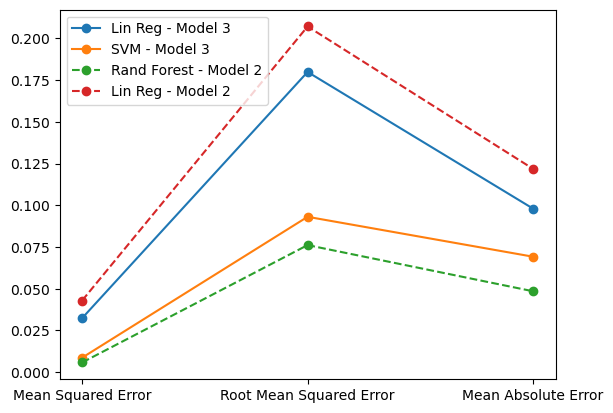

In [60]:
xcords = np.array(['Mean Squared Error', 'Root Mean Squared Error','Mean Absolute Error'])
ycords1 = np.array([mse_lr_model3, rmse_lr_model3, mae_lr_model3])
ycords2 = np.array([mse_svr_model3, rmse_svr_model3, mae_svr_model3])
ycords3 = np.array([mse_rf_model2, rmse_rf_model2, mae_rf_model2])
ycords4 = np.array([mse_lr_model2, rmse_lr_model2, mae_lr_model2])
plt.plot(xcords, ycords1,  label="Lin Reg - Model 3", marker='o')
plt.plot(xcords, ycords2,  label="SVM - Model 3", marker='o')
plt.plot(xcords, ycords3,  label="Rand Forest - Model 2", linestyle="--", marker='o')   #The graph is showing Comparison between different algorithm learned on a same dataset
plt.plot(xcords, ycords4,  label="Lin Reg - Model 2", marker='o', linestyle="--")       #The errors are just compared 

plt.legend()
plt.show()



In [ ]:
~